In [1]:
#Bài 1:
import numpy as np

signals = np.array([[1, 2], [3, 4], [10, 0]])
sample = np.array([3, -1])
result = np.inner(signals, sample)
print(result)

[ 1  5 30]


In [2]:
#1.1 Ứng dụng 1 – Nguyên lý tìm nốt nhạc trong chuỗi âm thanh (Audio search):
import numpy as np
A = np.array([0, 0, -1, 2, 3, -1, 0, 1, -1, -1])
search_vector = np.array([0, 1, -1])
print(len(A), len(search_vector))

B = np.array([1])
B = np.resize(B, (len(A) - len(search_vector) + 1, len(search_vector)))
B = np.asmatrix(B)
for i in range(len(A) - len(search_vector) + 1):
    for j in range(len(search_vector)):
        B[i, j] = A[i + j]
C = np.inner(B, search_vector)
for i in range(len(A) - len(search_vector) + 1):
    if C[0, i] == np.inner(search_vector, search_vector):
        print(i, B[i])

10 3
6 [[ 0  1 -1]]


In [3]:
from google.colab  import files
uploades = files.upload()

Saving TraiDat.png to TraiDat.png


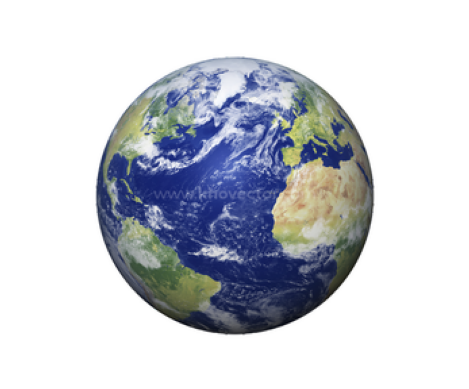

In [20]:
#Ứng dụng 2 – Tạo ảnh mẫu và làm mờ ảnh
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('TraiDat.png')
img.height
img.width
img.mode
img = img.convert("RGB")
new_width = int(img.width / 2)
new_height = int(img.height / 2)
new_img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
plt.imshow(new_img)
plt.axis('off')
plt.show()

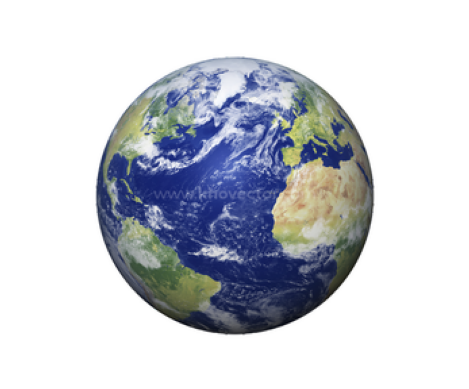

In [24]:
#Kỹ thuật làm mờ ảnh:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
input_image = Image.open('TraiDat.png')
input_pixels = input_image.load()
box_kernel = [
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]
kernel = box_kernel
offset = len(kernel) //
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for kx in range(len(kernel)):
            for ky in range(len(kernel)):
                pixel = input_pixels[x + kx - offset, y + ky - offset]
                acc[0] += pixel[0] * kernel[kx][ky]
                acc[1] += pixel[1] * kernel[kx][ky]
                acc[2] += pixel[2] * kernel[kx][ky]
        acc = [int(min(max(0, round(c)), 255)) for c in acc]
        draw.point((x, y), tuple(acc))
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [ ]:
!pip install scikit-image

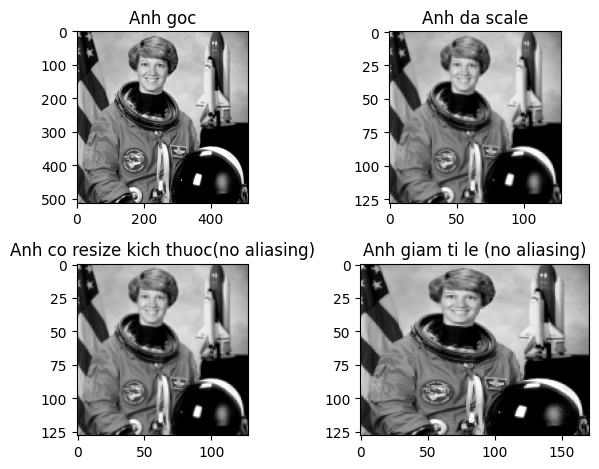

In [26]:
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())

image_rescaled = rescale(image, 1.0 / 4.0)
image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4))
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Anh goc")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Anh da scale")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Anh co resize kich thuoc(no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Anh giam ti le (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

In [27]:
#Bài 2:(đọc thêm )
import numpy as np
A = np.array([[0, 0, 1.0/2, 1.0/2],
              [1.0/3, 0, 0, 0],
              [1.0/3, 0, 0, 1.0/2],
              [1.0/3, 1.0, 1.0/2, 0]])

x = np.array([1, 1, 1, 1])
print("Ma trận A:")
print(A)
print("\nVector x:")
print(x)

Ma trận A:
[[0.         0.         0.5        0.5       ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.         0.         0.5       ]
 [0.33333333 1.         0.5        0.        ]]

Vector x:
[1 1 1 1]


In [28]:
import numpy as np
A = np.array([[0, 0, 1.0/2, 1.0/2],
              [1.0/3, 0, 0, 0],
              [1.0/3, 0, 0, 1.0/2],
              [1.0/3, 1.0, 1.0/2, 0]])
x = np.array([1.0, 1.0, 1.0, 1.0])
x_single = np.dot(A, x)
print("Kết quả sau 1 lần nhân:")
print(x_single)
print("\n" + "-"*50 + "\n")
print("Kết quả sau 10 lần lặp:")
for i in range(10):
    x = np.dot(A, x)
    print(f"{i+1}", x.round(4))
print("\nKết quả cuối cùng (pagerank):")
print(x.round(8))

Kết quả sau 1 lần nhân:
[1.         0.33333333 0.83333333 1.83333333]

--------------------------------------------------

Kết quả sau 10 lần lặp:
1 [1.     0.3333 0.8333 1.8333]
2 [1.3333 0.3333 1.25   1.0833]
3 [1.1667 0.4444 0.9861 1.4028]
4 [1.1944 0.3889 1.0903 1.3264]
5 [1.2083 0.3981 1.0613 1.3322]
6 [1.1968 0.4028 1.0689 1.3316]
7 [1.2002 0.3989 1.0647 1.3361]
8 [1.2004 0.4001 1.0681 1.3314]
9 [1.1997 0.4001 1.0658 1.3343]
10 [1.2001 0.3999 1.0671 1.333 ]

Kết quả cuối cùng (pagerank):
[1.20005466 0.39991641 1.06706131 1.33296762]


In [29]:
#2.2:
import numpy as np
A = np.array([[0, 0, 0.5, 0],
              [1/3, 0, 0, 0],
              [1/3, 0, 0, 0],
              [1/3, 1.0, 0.5, 0]])
A_fixed = A.copy()
A_fixed[3] = [0.25, 0.25, 0.25, 0.25]
x = np.array([1.0, 1.0, 1.0, 1.0])
for i in range(5):
    x = np.dot(A_fixed, x)
    print(f"{i+1}", np.round(x, 4))

1 [0.5    0.3333 0.3333 1.    ]
2 [0.1667 0.1667 0.1667 0.5417]
3 [0.0833 0.0556 0.0556 0.2604]
4 [0.0278 0.0278 0.0278 0.1137]
5 [0.0139 0.0093 0.0093 0.0493]


In [30]:
import numpy as np
A = np.array([[0,     0,   1.0/2, 1/4.0],
              [1.0/3, 0,     0,    1/4.0],
              [1.0/3, 0,     0,    1/4.0],
              [1.0/3, 1.0, 1.0/2, 1/4.0]])
x = np.array([1.0, 1.0, 1.0, 1.0])
print("Kết quả qua các lần lặp:")
for i in range(7):
    x = np.dot(A, x)
    print(f"{i+1} {np.round(x, 4)}")
max_val = np.max(x)
best_node = np.argmax(x) + 1
print(f"\nNode có rank cao nhất là D (node {best_node}) với giá trị: {max_val:.4f}")

Kết quả qua các lần lặp:
1 [0.75   0.5833 0.5833 2.0833]
2 [0.8125 0.7708 0.7708 1.6458]
3 [0.7969 0.6823 0.6823 1.8385]
4 [0.8008 0.7253 0.7253 1.7487]
5 [0.7998 0.7041 0.7041 1.792 ]
6 [0.8    0.7146 0.7146 1.7708]
7 [0.8    0.7094 0.7094 1.7813]

Node có rank cao nhất là D (node 4) với giá trị: 1.7813


# **Bài Tập Chương**

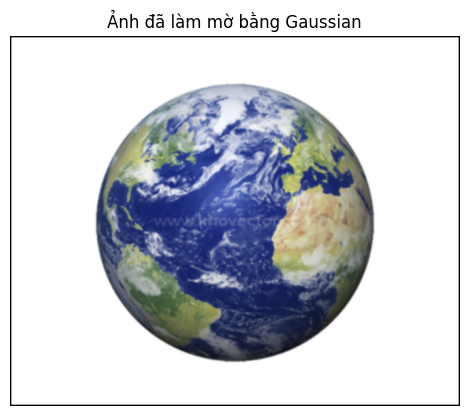

In [32]:
#Câu 1:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa kernel Gaussian 5x5
gaussian_kernel = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) / 256.0
input_image = Image.open('TraiDat.png')
input_pixels = input_image.load()
output_image = Image.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)
offset = len(gaussian_kernel) // 2
for x in range(offset, input_image.width - offset):
    for y in range(offset, input_image.height - offset):
        acc = [0, 0, 0]
        for kx in range(len(gaussian_kernel)):
            for ky in range(len(gaussian_kernel)):
                pixel = input_pixels[x + kx - offset, y + ky - offset]
                weight = gaussian_kernel[kx][ky]
                acc[0] += pixel[0] * weight  # Red
                acc[1] += pixel[1] * weight  # Green
                acc[2] += pixel[2] * weight  # Blue
        acc = [int(min(max(0, round(c)), 255)) for c in acc]
        draw.point((x, y), tuple(acc))
output_image.save('traidat_gaussian_blur.PNG')
plt.imshow(output_image)
plt.axis('off')
plt.title("Ảnh đã làm mờ bằng Gaussian")
plt.show()

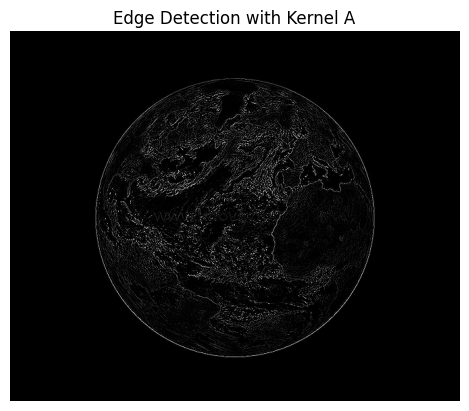

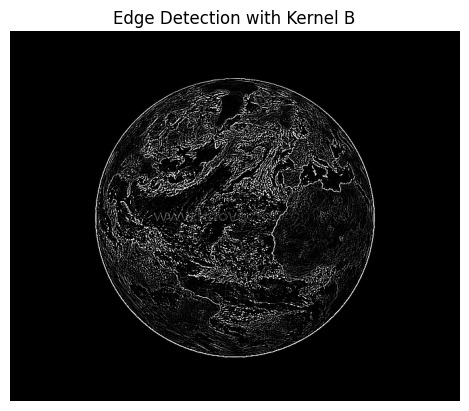

In [34]:
#Câu 2:
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
def edge_detection(input_path, output_path, kernel_type='a'):
    img = Image.open(input_path).convert('L')
    pixels = np.array(img)
    kernel_a = np.array([
        [0, -1, 0],
        [-1, 4, -1],
        [0, -1, 0]
    ])

    kernel_b = np.array([
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1]
    ])
    kernel = kernel_a if kernel_type == 'a' else kernel_b
    height, width = pixels.shape
    output = np.zeros_like(pixels, dtype=np.int32)
    for i in range(1, height-1):
        for j in range(1, width-1):
            region = pixels[i-1:i+2, j-1:j+2]
            output[i,j] = np.sum(region * kernel)
    output = np.clip(output, 0, 255).astype(np.uint8)
    Image.fromarray(output).save(output_path)
    plt.imshow(output, cmap='gray')
    plt.title(f"Edge Detection with Kernel {'A' if kernel_type == 'a' else 'B'}")
    plt.axis('off')
    plt.show()
input_image_path = 'TraiDat.png'
edge_detection(input_image_path, 'traidat_edge_a.png', 'a')
edge_detection(input_image_path, 'traidat_edge_b.png', 'b')